In [1]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import time
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
from sklearn.decomposition import PCA
import pandas as pd

output_list.pt stores the stacked predictions of the test samples in the format of [#samples, #classes]; label_list stores the true labels of all samples in a list of length #samples;

In [2]:
output_list = torch.load("output_list.pt").cpu().numpy() # replace with your own output_list and label_list
feature_list = torch.load("feature_list.pt").cpu().numpy()
label_list = torch.load("label_list.pt")

truth_list = []
for l in label_list:
    l = l.cpu().numpy().astype(np.int32)
    truth_list = np.concatenate((truth_list, l))
truth_label = truth_list.astype(np.int64)
pred_label = np.argmax(output_list, axis=1)

## Class-Wise Accuracy

In [7]:
n_classes = 50
class_acc_dic = {} # for each class's samples, how many are correctly predicted and how many are falsely predicted
for c in range(n_classes):
    class_acc_dic[c] = {}
    class_acc_dic[c]["T"] = 0
    class_acc_dic[c]["F"] = 0
for (tl, pl) in zip(truth_label, pred_label):
    if tl == pl:
        class_acc_dic[tl]["T"] += 1
    else:
        class_acc_dic[tl]["F"] += 1
        
for c in range(n_classes):
    acc = class_acc_dic[c]["T"] / (class_acc_dic[c]["T"] + class_acc_dic[c]["F"])
    print("class " + str(c) + " acc: " + str(acc))

class 0 acc: 0.998
class 1 acc: 0.997716894977169
class 2 acc: 0.9980119284294234
class 3 acc: 0.002288329519450801
class 4 acc: 0.9865470852017937
class 5 acc: 0.9929742388758782
class 6 acc: 0.6616379310344828
class 7 acc: 0.9952718676122931
class 8 acc: 0.9901477832512315
class 9 acc: 0.9851576994434137
class 10 acc: 1.0
class 11 acc: 0.9905482041587902
class 12 acc: 0.001092896174863388
class 13 acc: 1.0
class 14 acc: 0.9966722129783694
class 15 acc: 0.0
class 16 acc: 0.034858387799564274
class 17 acc: 1.0
class 18 acc: 0.9828850855745721
class 19 acc: 0.9929742388758782
class 20 acc: 0.9938176197836167
class 21 acc: 1.0
class 22 acc: 1.0
class 23 acc: 0.9823529411764705
class 24 acc: 0.9900990099009901
class 25 acc: 0.0011148272017837235
class 26 acc: 0.0
class 27 acc: 0.9954853273137697
class 28 acc: 1.0
class 29 acc: 0.0
class 30 acc: 0.9983660130718954
class 31 acc: 1.0
class 32 acc: 0.9793103448275862
class 33 acc: 0.9884467265725289
class 34 acc: 0.9917525773195877
class 35 a

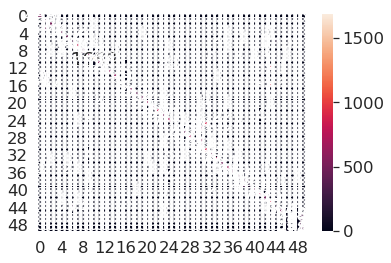

In [13]:
# use a smaller n_classes value to view better...[-.-]
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(truth_label, pred_label)
f = sns.heatmap(cm, annot=True, fmt='d')

## Visualization

In [26]:
def scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int64)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('on')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

def pca_visualize(pool, colors):
    time_start = time.time()

    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(pool)

    print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]

    print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

    top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
    
    scatter(top_two_comp.values,colors)
    
def tsne_visualize(pool, colors):
    RS = 123
    model_tsne = TSNE(random_state=RS).fit_transform(pool)
    scatter(model_tsne, colors)

In [21]:
len(truth_label)

29310

In [23]:
viewed_samples = 1000 # number of points to be seen
pool = feature_list[:viewed_samples]
print(pool.shape)
colors = truth_label[:viewed_samples]
print(len(colors))

(1000, 100)
1000


In [24]:
# check out the unique colors included, make sure a consecutive list starting from 0 is included
print(np.unique(colors))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


PCA done! Time elapsed: 0.01676034927368164 seconds
Variance explained per principal component: [0.37959608 0.19823447 0.15238462 0.12275939]


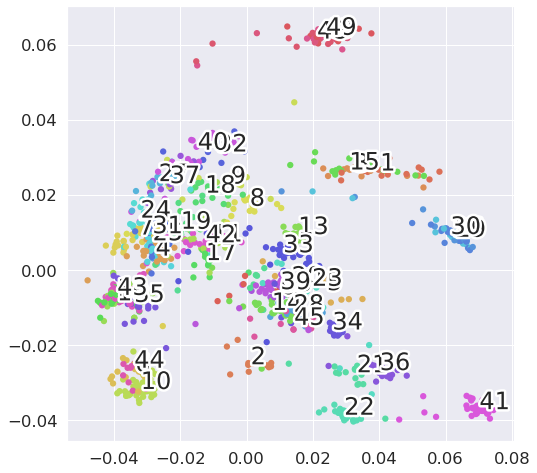

In [28]:
# sample run of pca
pca_visualize(pool, colors)

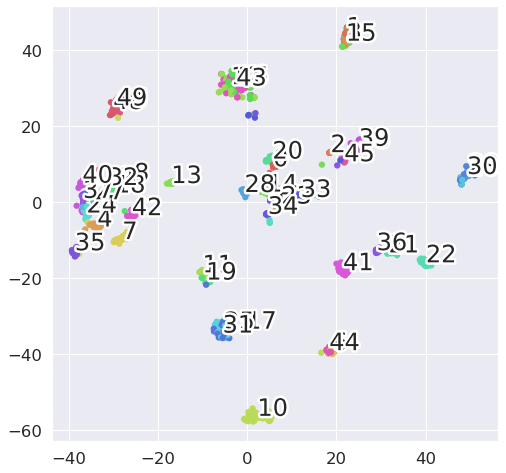

In [29]:
# sample run of tsne
tsne_visualize(pool, colors)

In [19]:
t1 = torch.randn((6, 196608)).unsqueeze(0)
m = torch.nn.AvgPool2d((1, 2000), stride=(1, 1950))
t2 = m(t1).squeeze(0)
t2.shape

torch.Size([6, 100])

## Prepare Dataset

In [ ]:
# import os
# import csv

# authors = os.listdir("./C50/C50train")
# for a in authors:
#     if not os.path.isdir("./C50/C50train/" + a):
#         print(a)
#         os.remove("./C50/C50train/" + a)
# len(authors)

# authors_test = os.listdir("./C50/C50test")
# for at in authors_test:
#     if not os.path.isdir("./C50/C50test/" + at):
#         print(at)
#         os.remove("./C50/C50test/" + at)
#     if at not in authors:
#         print(at)
# len(authors_test)

# header = ['index', 'author', 'title', 'train', 'content']
# table_name = "./datasets/ccat50"
# f = open(table_name + ".csv", 'w', encoding='UTF8')
# writer = csv.writer(f)
# writer.writerow(header)

# for a in authors:
#     articles_train = os.listdir("./C50/C50train/" + a)
#     articles_test = os.listdir("./C50/C50test/" + a)
#     for art_train in articles_train:
#         if not art_train.endswith('.txt'):
#             continue
#         file = open("./C50/C50train/" + a + "/" + art_train)
#         line = file.read().replace("\n", " ")
#         file.close()
#         writer.writerow(['', a, art_train[:-4], 1, line])
#     for art_test in articles_test:
#         if not art_test.endswith('.txt'):
#             continue
#         file = open("./C50/C50test/" + a + "/" + art_test)
#         line = file.read().replace("\n", " ")
#         file.close()
#         writer.writerow(['', a, art_train[:-4], 0, line])
# f.close()